In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Reading data

In [2]:
male = pd.read_csv("../files/data9b_m.csv")
female = pd.read_csv("../files/data9b_f.csv")

male.index.stop, female.index.stop

(818, 950)

## Calcing mean steps and creating histograms

In [3]:
print(f"Male steps mean: {male.steps.mean()}")
print(f"Female steps mean: {female.steps.mean()}")

Male steps mean: 7792.545232273838
Female steps mean: 6857.763157894737


In [4]:
stats.ttest_ind(male.steps, female.steps, )

Ttest_indResult(statistic=5.539053975609961, pvalue=3.498915026461386e-08)

<AxesSubplot:ylabel='Frequency'>

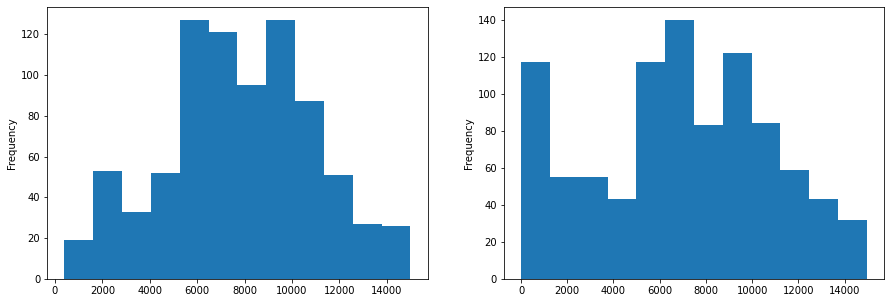

In [5]:
fig, [m_ax, f_ax] = plt.subplots(1, 2, figsize=(15, 5))
male.steps.plot.hist(ax=m_ax, bins=12)
female.steps.plot.hist(ax=f_ax, bins=12)

## Personns correolation

In [6]:
male_corr = stats.pearsonr(male.steps, male.bmi)
female_corr = stats.pearsonr(female.steps, female.bmi)


print(f"Male Pearson's correlation: {male_corr}")
print(f"Female Pearson's correlation: {female_corr}")

Male Pearson's correlation: (-0.1600704979175654, 4.2082103181889605e-06)
Female Pearson's correlation: (-0.3558514620041998, 9.704490533930592e-30)


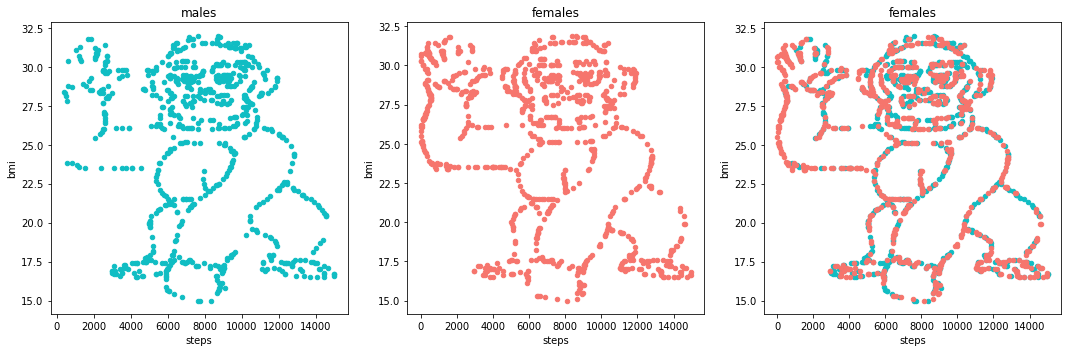

In [7]:
fig, [m_ax, f_ax, c_ax] = plt.subplots(1, 3, figsize=(15, 5))
male.plot.scatter(x="steps", y="bmi", color="#10bdc3", ax=m_ax, title="males")
female.plot.scatter(x="steps", y="bmi", color="#f6756d", ax=f_ax, title="females")
male.plot.scatter(x="steps", y="bmi", color="#10bdc3", ax=c_ax, title="males")
female.plot.scatter(x="steps", y="bmi", color="#f6756d", ax=c_ax, title="females")

plt.tight_layout()

*Excercise 2*: Questions for DAOST
* Explain in your own words the point of the jitter plot.
    * When showing 1-D data, it can be confusing, even misleading, if the values are integers, and/or we have multiples of the same value. By offseting the values-y coordinate a bit, we can show all points. Opaque circles are best for distinguishing multiple points
* Explain in your own words the point of figure 2-3. (I'm going to skip saying "in your own words" going forward, but I hope you get the point; I expect all answers to be in your own words).
    * Bins can be deceptive. 2-3 shows, that the same data can be visually intepreted very differently according to how the bins are places.
* The author of DAOST (Philipp Janert) likes KDEs (and think they're better than histograms). And we don't. Sune didn't give a detailed explanation in the video, but now that works to our advantage. We'll ask you to think about this and thereby create an excellent exercise: When can KDEs be misleading? 
    * If the kernel is too big, it might smooth the data too much. Because the kernel is also effectively smoothing, so it can be misleading in that sense.
* Sune discussed some strengths of the CDF - there are also weaknesses. Janert writes "CDFs have less intuitive appeal than histograms of KDEs". What does he mean by that?
    * It might not be immideately obvious that the graph is ascending, and it could look like a upward going trend.
* What is a *Quantile plot*? What is it good for. 
    * 
* How is a *Probablity plot* defined? What is it useful for? Have you ever seen one before?
* One of the reasons we like DAOST is that Janert is so suspicious of mean, median, and related summary statistics. Explain why one has to be careful when using those - and why visualization of the full data is always better. 
* Sune loves box plots (but not enough to own one of [these](https://twitter.com/statisticiann/status/1387454947143426049) 😂). When are box plots most useful?
* The book doesn't mention [violin plots](https://en.wikipedia.org/wiki/Violin_plot). Are those better or worse than box plots? Why?

## Exercise 3


In [35]:
df = pd.read_csv("../data/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
df["dt"] = pd.to_datetime(df.Date + df.Time, format="%m/%d/%Y%H:%M")
focuscrimes = ['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']

In [9]:
df.columns

Index(['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript',
       'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X',
       'Y', 'location', 'SF Find Neighborhoods 2 2',
       'Current Police Districts 2 2', 'Current Supervisor Districts 2 2',
       'Analysis Neighborhoods 2 2', 'DELETE - Fire Prevention Districts 2 2',
       'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2',
       'DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2',
       'DELETE - 2017 Fix It Zones 2 2',
       'Civic Center Harm Reduction Project Boundary 2 2',
       'Fix It Zones as of 2017-11-06  2 2', 'DELETE - HSOC Zones 2 2',
       'Fix It Zones as of 2018-02-07 2 2',
       'CBD, BID and GBD Boundaries as of 2017 2 2',
       'Areas of Vulnerability, 2016 2 2',
       'Central Market/Tenderloin Boundary 2 2',
       'Central Market/Tenderloin Boundary Polygon - Updated 2 2',
       'HSOC Zones as of 2018-06-05 2 2', 'OWED Public Spaces 2 2',
       

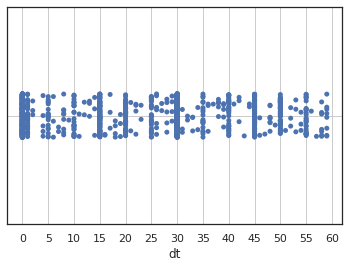

In [18]:
start_date = pd.to_datetime("9/18/2003")
end_date = pd.to_datetime("10/18/2003")

t = df[(df.Category == "LARCENY/THEFT") & df.dt.between(start_date, end_date)]
x = t.dt.dt.minute

sns.set(style="white", color_codes=True)
sns.stripplot(x=x)
plt.xticks([x for x in range(0, 61, 5)])
plt.grid()
plt.show()

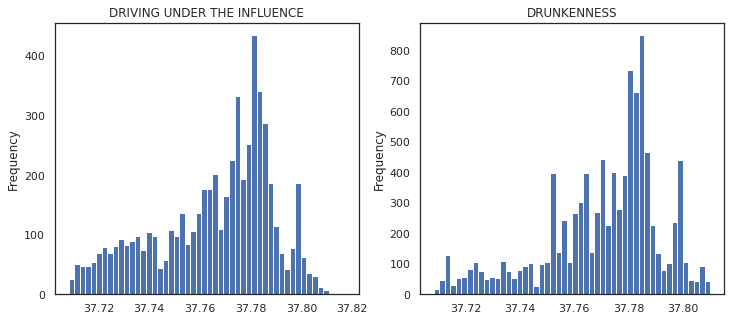

In [58]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 5))
cat2 = focuscrimes[6]
cat1 = focuscrimes[2]
df[df.Category == cat1].Y.plot.hist(ax=ax1, title=cat1, bins=50)
df[df.Category == cat2].Y.plot.hist(ax=ax2, title=cat2, bins=50)
plt.show()

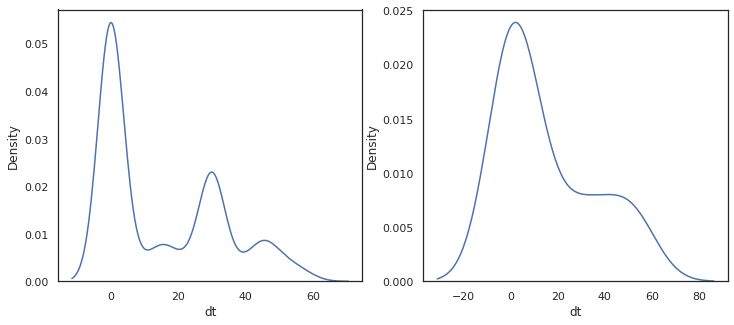

In [62]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 5))
sns.kdeplot(x, ax=ax1)
sns.kdeplot(x.sample(25), ax=ax2)
plt.show()

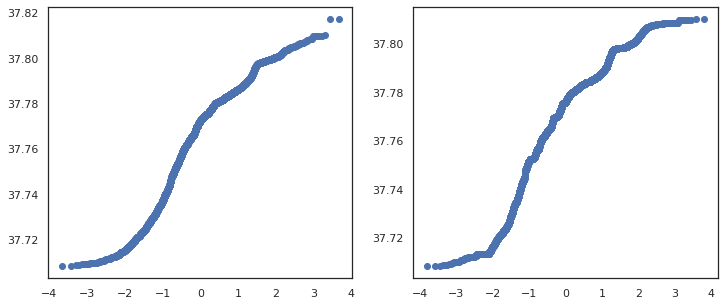

In [79]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 5))
a = stats.probplot(df[df.Category == cat1].Y)[0]
b = stats.probplot(df[df.Category == cat2].Y)[0]
ax1.scatter(*a)
ax2.scatter(*b)

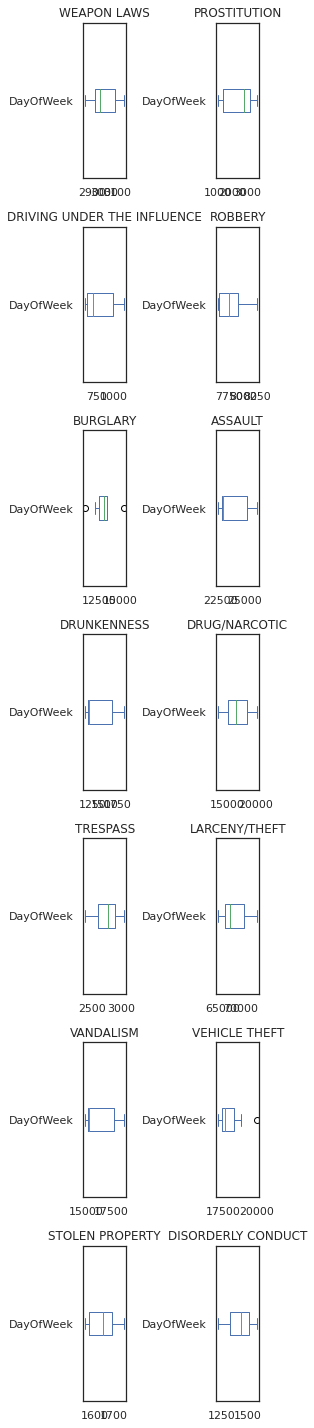

In [103]:
fig, axs = plt.subplots(7, 2, figsize=(4, 20))
for crime, ax in zip(focuscrimes, axs.flatten()):
    df[df.Category == crime].DayOfWeek.plot.box(vert=False, ax=ax, title=crime)
plt.tight_layout()

<AxesSubplot:>

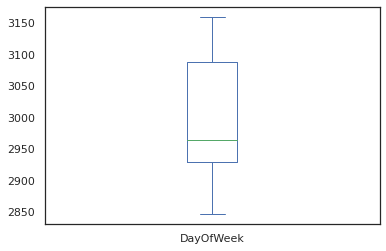